In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Left_arm_2019-01-26_17-46-25.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-444.68,-24.02,258.67,-3442.88,0.0,0.0,0.0,17:47:06.578
7,1,-480.17,-50.05,253.42,-3350.60,0.0,0.0,0.0,17:47:06.593
8,2,-528.79,-79.70,270.43,-3284.74,0.0,0.0,0.0,17:47:06.593
9,3,-490.02,-47.02,281.45,-3331.83,0.0,0.0,0.0,17:47:06.608
10,4,-446.77,-29.40,267.39,-3457.94,0.0,0.0,0.0,17:47:06.608


## Time Domain Analysis

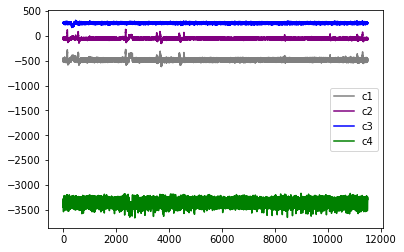

In [5]:
plt.plot(data['c1'],'grey')
plt.plot(data['c2'],'purple')
plt.plot(data['c3'],'blue')
plt.plot(data['c4'],'green')
plt.legend()

plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(11488, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(11244, 4)

In [9]:
X

array([[ -455.36,   -41.05,   242.92, -3426.09],
       [ -471.6 ,   -52.6 ,   248.3 , -3452.27],
       [ -526.62,   -85.69,   249.85, -3244.92],
       ..., 
       [ -460.85,   -49.71,   249.95, -3377.27],
       [ -515.79,   -85.54,   269.17, -3281.58],
       [ -500.21,   -60.1 ,   265.93, -3292.47]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

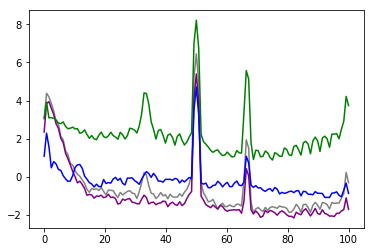

In [12]:
color = ['grey', 'purple', 'blue', 'green']
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1), c=color[i])

** Alpha waves!! ** 

## Spectrogram Analysis

In [13]:
data.shape

(11488, 9)

In [14]:
X = np.array(data.ix[250:, 1:5])
X.shape

(11244, 4)

In [15]:
sig = X[:, 0]

In [16]:
sig.shape

(11244,)

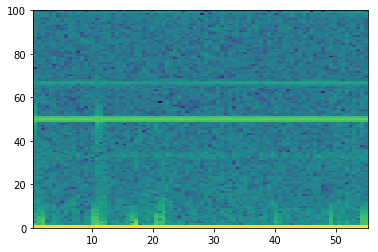

In [17]:
_ = plt.specgram(sig, NFFT=256, Fs=200.0)

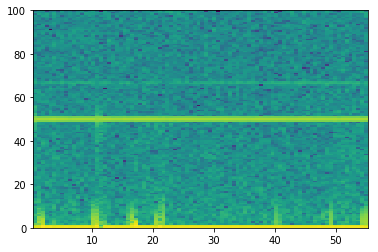

In [18]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=256, Fs=200.0) # sampling rate is 200hz

In [19]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

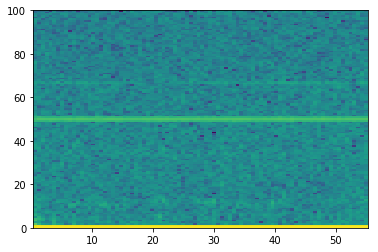

In [20]:
sig = X[:, 2]
_ = plt.specgram(sig, Fs=200.0)

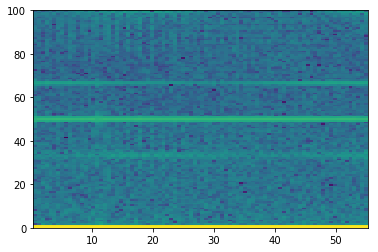

In [21]:
sig = X[:, 3]
_ = plt.specgram(sig, Fs=200.0)